Banco de dados utilizado:https://brasil.io/dataset/covid19/caso/?search=&date=&state=PE&city=Paulista&place_type=&is_last=False&city_ibge_code=&order_for_place=


Cidade escolhida: Paulista-PE
           date  diario  media_movel
0    03/04/2020       0          NaN
1    04/04/2020       0          NaN
2    05/04/2020       2          NaN
3    06/04/2020       0          NaN
4    07/04/2020       3          NaN
5    08/04/2020       1          NaN
6    09/04/2020      14        2.857
7    10/04/2020      11        4.429
8    11/04/2020       6        5.286
9    12/04/2020       7        6.000
10   13/04/2020      20        8.857
11   14/04/2020       8        9.571
12   15/04/2020       8       10.571
13   16/04/2020      15       10.714
14   17/04/2020      24       12.571
15   18/04/2020       8       12.857
16   19/04/2020      13       13.714
17   20/04/2020      10       12.286
18   21/04/2020      11       12.714
19   22/04/2020      20       14.429
20   23/04/2020      24       

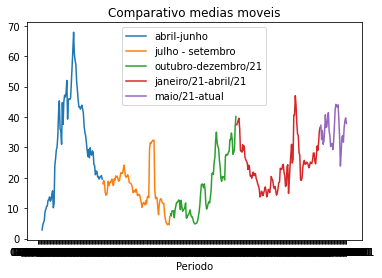

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from tabulate import tabulate




completa= pd.read_csv('covid_paulista.csv', sep=';',  parse_dates=True)


completa['media_movel'] = completa["diario"].rolling(7).mean()


#completa["media_movel"].plot()




#gerar grafico belo
#######



eixoxsplit1 = completa.iloc[0:87,0].values
eixoysplit1 = completa.iloc[0:87,2].values 
eixoxsplit2 = completa.iloc[88:178,0].values
eixoysplit2 = completa.iloc[88:178,2].values 
eixoxsplit3 = completa.iloc[179:267,0].values
eixoysplit3 = completa.iloc[179:267,2].values 
eixoxsplit4 = completa.iloc[268:380,0].values
eixoysplit4 = completa.iloc[268:380,2].values 
eixoxsplit5 = completa.iloc[381:416,0].values
eixoysplit5 = completa.iloc[381:416,2].values 


#plt.subplot(5, 1, 1)
plt.plot(eixoxsplit1, eixoysplit1, label='abril-junho')
plt.title('Comparativo medias moveis')
plt.legend(loc='best')
#plt.ylabel('Casos')
plt.xlabel('maio-julho')



#plt.subplot(5, 1, 2)
plt.plot(eixoxsplit2, eixoysplit2, label='julho - setembro')
plt.legend(loc='best')
#plt.title('Comparativo medias moveis')
#plt.ylabel('Casos')
plt.xlabel('agosto-outubro')

#plt.subplot(5, 1, 3)
plt.plot(eixoxsplit3, eixoysplit3, label='outubro-dezembro/21' )
plt.legend(loc='best')
#plt.title('Comparativo medias moveis')
#plt.ylabel('Casos')
plt.xlabel('novembro-janeiro/21')

#plt.subplot(5, 1, 4)
plt.plot(eixoxsplit4, eixoysplit4, label='janeiro/21-abril/21')
plt.legend(loc='best')
#plt.title('Comparativo medias moveis')
#plt.ylabel('Casos')
plt.xlabel('fevereiro/21-abril/21')

#plt.subplot(5, 1, 5)
plt.plot(eixoxsplit5, eixoysplit5, label='maio/21-atual')
plt.legend(loc='best')
#plt.title('Comparativo medias moveis')
#plt.ylabel('Casos')
plt.xlabel('Periodo')
#plt.tight_layout()




eixox=np.arange(0,394,1)
eixoy= completa.iloc[0:394,1].values

#resposta 2
lm_model = LinearRegression()
lm_model.fit(eixox.reshape(-1,1), eixoy)

# extrair coeficientes
slope = lm_model.coef_
intercept = lm_model.intercept_

'''
# imprimir os valores encontrados para os parâmetros
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))
'''

#usarei pra questoa 3 pra ver o erro
valores_reais = completa.iloc[395::, 1].values


previsoes= []

for indice in range(395,416,1):
    previsoes.append(slope*indice + intercept)
    
    
dataFrame_previsoes= pd.DataFrame(previsoes)
dataFrame_previsoes["date"] = completa.iloc[395::, 0].values
dataFrame_previsoes["valor real"] = completa.iloc[395::, 1].values

#resposta 3


erro_rel= []
for ind in range(0,21,1):
    erro_rel.append((abs(previsoes[ind] - valores_reais[ind]))/valores_reais[ind])

dataFrame_erroRel= pd.DataFrame(erro_rel)
dataFrame_erroRel["date"] = completa.iloc[395::, 0].values




erro_med= []
for ind in range(0,21,1):
    erro_med.append((previsoes[ind] - valores_reais[ind])**2/ 21)

dataFrame_erroMed= pd.DataFrame(erro_med)

erro_medio= (sum(erro_med))**0.5

#print('Desvio Medio quadratico : ', +erro_medio)


#Variaveis resposta:



print('Banco de dados utilizado:https://brasil.io/dataset/covid19/caso/?search=&date=&state=PE&city=Paulista&place_type=&is_last=False&city_ibge_code=&order_for_place=')

print('\n\nCidade escolhida: Paulista-PE')

#completa["media_movel"].plot()

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(completa)
    
    
    #2 questao

dataFrame_previsoes

print('\n\nQUESTÃO 2:  Previsoes para 21 dias\n\n')
print('PREVISÃO--DATA--DADO REAL\n')
print(dataFrame_previsoes)

print('\n\nQUESTÃO 3: erros ')

print('Erros relativos\n')

print(dataFrame_erroRel)

print('\n\nDesvio Medio quadratico : ', +erro_medio)





    
    

